			REGRESSÃO LINEAR
Beta: 0.000120, Beta0: 2.189854, R_Value: 0.862271, P_Value: 0.000000, stdErr: 0.000003 
y = 0.000120x  2.18985
Correlação: 0.862270605470 P-Value: 0.000000000000
3.133006605841909e-136


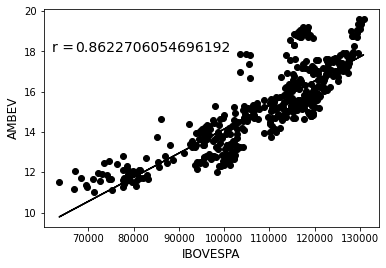

In [18]:
import matplotlib.pyplot as fig
import xlrd
import numpy as ny
from scipy import stats as st

excel = xlrd.open_workbook("ibovespa.xls")
ibov = excel.sheet_by_name("Ibov")
ambev = excel.sheet_by_name("ABEV3")

linIbov = ibov.nrows
colIbov = ibov.ncols
dadosIbov = []

linAbev = ambev.nrows
colAbev  =ambev.ncols
dadosAbev = []

for i in range(colIbov):
    coluna1 = ibov.col_values(i)
    dadosIbov.append(coluna1)
    
    coluna2 = ambev.col_values(i)
    dadosAbev.append(coluna2)

dadosIbov = ny.array(dadosIbov)
dadosAbev = ny.array(dadosAbev)

beta, beta0, rValue, pValue, stdErr = st.linregress(dadosIbov[1], dadosAbev[1])
print("\t\t\tREGRESSÃO LINEAR")
print("Beta: {:.6f}, Beta0: {:.6f}, R_Value: {:.6f}, P_Value: {:.6f}, stdErr: {:.6f} ".format(beta, beta0, rValue, pValue, stdErr))
print("y = {:.6f}x  {:.6}".format(beta, beta0))

yLin = beta*dadosIbov[1] + beta0
fig.plot(dadosIbov[1], yLin, '-k', dadosIbov[1], dadosAbev[1], 'ok')
fig.xlabel("IBOVESPA", fontsize=12)
fig.ylabel("AMBEV", fontsize=12)

cor, pval = st.pearsonr(dadosIbov[1], dadosAbev[1])
fig.text(62000, 18, 'r =', fontsize=14)
fig.text(67000, 18, str(cor), fontsize=14)
print("Correlação: {:.12f} P-Value: {:.12f}".format(cor, pval))